## <u>Part One - PROJECT BASED </u>

• <b>DOMAIN:</b> Semiconductor manufacturing process 

• <b>CONTEXT:</b> A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific
monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature
selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors
contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning
and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out
different combinations of features, essential signals that are impacting the yield type can be identified.

• <b>DATA DESCRIPTION:</b> sensor-data.csv : (1567, 592) <br>
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

• <b>PROJECT OBJECTIVE:</b> We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

<b>Steps and tasks: </b>

<b>1.Import and explore the data: </b>

<b>2.Data cleansing: </b>

• Missing value treatment<br> 
• Drop attribute/s if required using relevant functional knowledge.<br> 
• Make all relevant modifications on the data using both functional/logical reasoning/assumptions.<br> 

<b>3.Data analysis & visualisation: </b>

• Perform detailed relevant statistical analysis on the data.<br> 
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. <br>

<b>4.Data pre-processing:</b>

• Segregate predictors vs target attributes. <br> 
• Check for target balancing and fix it if found imbalanced. <br>
• Perform train-test split and standardise the data or vice versa if required. <br>
• Check if the train and test data have similar statistical characteristics when compared with original data.
<br>  

<b>5.Model training, testing and tuning: </b>

• Model training:<br><br>
    - Pick up a supervised learning model.<br>
    - Train the model.<br>
    - Use cross validation techniques.<br>
        Hint: Use all CV techniques that you have learnt in the course.<br>
    - Apply hyper-parameter tuning techniques to get the best accuracy.<br>
        Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.<br>
    - Use any other technique/method which can enhance the model performance.<br>
        Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.<br>
    - Display and explain the classification report in detail.<br>
    - Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to
new train and test accuracies.<br>
       <br>
    - Apply the above steps for all possible models that you have learnt so far.<br>
    
• Display and compare all the models designed with their train and test accuracies.<br> 
• Select the final best trained model along with your detailed comments for selecting this model.<br> 
• Pickle the selected model for future use.<br> 
• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.<br> 

<b>6.Conclusion and improvisation: </b>

• Write your conclusion on the results.

<br><br>

### <u>Solution</u>

### 1.Import and explore the data:

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

In [2]:
semi = pd.read_csv('Signal-data-1.csv')


In [3]:
#Importing the validation dataset for future analysis
val = pd.read_excel('Future_predictions.xlsx')

In [4]:
#Shape and size of the first dataset
print(semi.shape)
print(semi.size)

(1567, 592)
927664


In [5]:
#Shape and size of the second dataset
print(val.shape)
print(val.size)

(18, 591)
10638


We can see there are a lot of columns in the first dataset (592) we need to find the relevant ones for our model. Second dataset contains only 18 rows.


In [6]:
semi.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,-0.0367,0.0014,0.9634,196.2746,0.0,8.4061,409.1399,9.8470,0.9701,186.4275,12.5222,1.4208,-5575.25,2755.5,-4149.25,-1533.50,1.3330,1.9803,7.4065,66.2000,2.9556,0.2366,3.3769,85.3498,8.6397,50.6324,64.1999,49.3676,65.3490,86.7217,117.6740,4.138,0.2003,70.0,361.8609,9.9501,143.0718,749.7516,1.2123,141.7482,1.0,646.6809,257.9247,0.0,4.632,4.908,2845.0,0.9231,0.9438,4.5554,0.4836,361.5118,10.2084,123.5555,11.7073,19.5164,26.2174,723.5343,0.9488,149.9064,1.0,634.9736,111.8165,166.6571,468.3165,0.0,0.0204,-0.0132,0.0251,0.0022,-0.0156,-0.0011,-0.0344,-0.0095,6.8241,0.1284,NaN,2.4320,0.9680,1773.5327,0.2140,9242.0100,-0.0142,0.0011,-0.0002,0.0001,0.0002,-0.1808,0.0,0.1452,0.0372,0.0003,0.0001,0.0373,-0.0052,-0.0005,-0.0011,0.0002,0.1023,0.0718,NaN,NaN,NaN,NaN,0.9397,0.0,790.0665,0.9904,59.4838,0.6005,0.9672,6.3060,15.87,3.150,15.87,15.84,1.045,2.582,0.5323,3.555,-0.4258,0.7785,0.9997,2.3122,1006.4594,38.0592,92.0,63.7,28.9,74.7,416.4299,0.3067,0.0,6.11,0.0053,0.0850,0.0518,0.0612,0.0212,13.7967,0.0,5.292,19.587,0.4062,0.0142,13.4348,0.45,0.0776,NaN,NaN,1036.0,644.0,3818.0,5475.0,0.109,0.066,0.065,2.6,1.2,0.147,0.325,0.8505,0.1437,0.3962,0.6196,0.3962,0.9807,0.1998,0.196,0.0,0.0,22.15,0.426,9.67,20.564,0.1215,4.14,0.0,16.88,52.720,0.0,0.0,0.0,0.0,0.0,0.0,0.270,5.30,20.21,0.440,8.92,17.69,5.30,6.797,21.532,0.1299,5.95,0.0,17.69,82.523,0.0,0.0622,0.0479,0.0772,0.1055,0.0474,0.0886,0.0494,0.0384,5.9548,0.0018,NaN,0.0945,0.0097,200.1670,0.0523,765.2998,0.0,0.0196,0.0158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0053,0.0052,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0179,0.0,74.1862,0.0013,2.7930,0.0273,0.0173,0.3696,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [7]:
val.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1,624.3145,218.3174,0,4.592,4.841,2834,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1,608.1700,84.0793,NaN,NaN,0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123,111.3,75.2,46.2000,350.6710,0.3948,0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017,967,1066,368,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0,0,20.95,0.333,12.49,16.713,0.0803,5.72,0,11.19,65.363,0,0,0,0,0,0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0,10.30,97.314,0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0,0.0744,0.0546,0,0,0,0,0,0,0,0,0,0.0027,0.0040,0,0,0,0,NaN,NaN,NaN,NaN,0.0188,0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0,0,0,0,0,0,0,0,0,0,0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0,2.5883,0.0010,0.0319,0.01

Just from the above sample data we can observe there is no column names present and there is lot of null values present. We can further analysis.

### 2. Data cleansing:

In [8]:
semi.dtypes.value_counts()

float64    591
object       1
dtype: int64

Since there is 592 columns we can see that data type of each column is correctly inputted.

In [9]:
#The time column doesn't give any meaning so dropping it.
semi.drop(['Time'],axis=1,inplace=True)
val.drop(['Time'],axis=1,inplace=True)

print('Shape of first dataset = ',semi.shape)
print('Shape of second dataset = ',val.shape)

Shape of first dataset =  (1567, 591)
Shape of second dataset =  (18, 590)


In [10]:
#Lets look for null values
semi.isnull().sum().sort_values(ascending = False)

293          1429
292          1429
157          1429
158          1429
492          1341
220          1341
85           1341
358          1341
384          1018
109          1018
383          1018
110          1018
111          1018
246          1018
518          1018
517          1018
516          1018
245          1018
244          1018
382          1018
578           962
579           962
580           962
581           962
72            802
73            802
345           802
346           802
112           726
247           726
519           726
385           726
562           284
569           284
568           284
567           284
563           284
564           284
565           284
566           284
553           277
552           277
557           277
556           277
555           277
550           277
546           277
547           277
548           277
549           277
554           277
551           277
224            69
225            69
496            69
497       

In [11]:
semi.isnull().sum(axis=1).sort_values(ascending = False)

1566    590
1565    590
1550    590
1551    590
1552    590
1553    590
1554    590
1555    590
1556    590
1557    590
1558    590
1559    590
1560    590
1561    590
1562    590
1563    590
1564    590
1549    590
1548    152
1546    148
1543    140
1134    100
493     100
792      99
75       96
796      96
77       96
1036     92
977      92
717      88
71       87
494      84
682      84
828      84
115      84
281      80
1188     76
734      72
76       68
910      68
1216     68
298      64
789      64
318      64
1529     60
1536     60
1537     60
1534     60
1542     60
1533     60
1547     60
177      60
441      56
1538     56
1531     56
1525     52
1544     52
662      52
665      52
1530     52
1122     52
1524     52
658      52
1545     52
1540     52
1535     52
133      52
571      51
2        49
813      48
714      48
691      48
679      48
661      48
560      48
643      48
641      48
80       48
183      48
311      48
328      48
379      48
465      48
482 

From above two codes we have checked for null values in both column wise and row wise, and we can see almost every column have null values.
Dropping the null values without checking further might be problamatic. Since this is signal readings the values are not present means they are
not available or not calculated. Only thing we can do is replace them with zeros.

In [12]:
#Since from above we can see lot of null values , it is advisable to check the 5 point summary for each column
semi.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1543.0,3014.617025,73.850987,2743.2400,2966.325000,3011.49000,3057.045000,3356.3500
1,1542.0,2495.495383,80.469311,2158.7500,2452.112500,2498.97500,2538.550000,2846.4400
2,1535.0,2200.287873,29.436192,2060.6600,2180.888900,2200.98890,2217.866700,2315.2667
3,1535.0,1398.678866,442.942283,0.0000,1084.377900,1285.21440,1592.172750,3715.0417
4,1535.0,4.232053,56.684272,0.6815,1.017700,1.31680,1.529100,1114.5366
5,1535.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
6,1535.0,101.091224,6.260266,82.1311,97.880000,101.51220,104.530000,129.2522
7,1540.0,0.121819,0.009010,0.0000,0.121100,0.12240,0.123800,0.1286
8,1547.0,1.462330,0.074042,1.1910,1.410700,1.46110,1.516600,1.6564
9,1547.0,-0.000892,0.015087,-0.0534,-0.010800,-0.00130,0.008250,0.0749


In [13]:
#Checking the number of constant  columns
(semi.iloc[:,0:-1].std()==0).value_counts()

False    474
True     116
dtype: int64

In [14]:
#From above summary it is observable that a lot of columns have 0 as standard deviation, which means those columns  have one or no value. 
#They won't convey any meaning to us, so better to drop it.
#we are dropping columns that have constant value/signal. That is some columns might not contain any data for our analysis. So it is better to drop them.
#Here we are using standarad deviation as a parameter for dropping the column
cols = semi.drop(['Pass/Fail'],axis=1).columns
col_std = semi[cols].std()
const_val = col_std[col_std==0].index
semi.drop(const_val, axis=1,inplace = True)
semi.head()



,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,238,239,244,245,246,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,365,366,367,368,376,377,382,383,384,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,499,500,510,511,516,517,518,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3040.34,2501.16,2207.3889,962.5317,1.2043,104.0311,0.1210,1.5481,-0.0367,0.0014,0.9634,196.2746,8.4061,409.1399,9.8470,0.9701,186.4275,12.5222,1.4208,-5575.25,2755.5,-4149.25,-1533.50,1.3330,1.9803,7.4065,66.2000,2.9556,0.2366,3.3769,85.3498,8.6397,50.6324,64.1999,49.3676,65.3490,86.7217,117.6740,4.138,0.2003,361.8609,9.9501,143.0718,749.7516,1.2123,141.7482,646.6809,257.9247,4.632,4.908,2845.0,0.9231,0.9438,4.5554,0.4836,361.5118,10.2084,123.5555,11.7073,19.5164,26.2174,723.5343,0.9488,149.9064,634.9736,111.8165,166.6571,468.3165,0.0,0.0204,-0.0132,0.0251,0.0022,-0.0156,-0.0011,-0.0344,-0.0095,6.8241,0.1284,NaN,2.4320,0.9680,1773.5327,0.2140,9242.0100,-0.0142,0.0011,-0.0002,0.0001,0.0002,-0.1808,0.1452,0.0372,0.0003,0.0001,0.0373,-0.0052,-0.0005,-0.0011,0.0002,0.1023,0.0718,NaN,NaN,NaN,NaN,0.9397,0.0,790.0665,0.9904,59.4838,0.6005,0.9672,6.3060,15.87,3.150,15.87,15.84,1.045,2.582,0.5323,3.555,-0.4258,0.7785,0.9997,2.3122,1006.4594,38.0592,92.0,63.7,28.9,74.7,416.4299,0.3067,6.11,0.0053,0.0850,0.0518,0.0612,0.0212,13.7967,5.292,19.587,0.4062,0.0142,13.4348,0.45,0.0776,NaN,NaN,1036.0,644.0,3818.0,5475.0,0.109,0.066,0.065,2.6,1.2,0.147,0.325,0.8505,0.1437,0.3962,0.6196,0.3962,0.9807,0.1998,0.196,22.15,0.426,9.67,20.564,0.1215,4.14,16.88,52.720,0.270,5.30,20.21,0.440,8.92,17.69,5.30,6.797,21.532,0.1299,5.95,0.0,17.69,82.523,0.0,0.0622,0.0479,0.0772,0.1055,0.0474,0.0886,0.0494,0.0384,5.9548,0.0018,NaN,0.0945,0.0097,200.1670,0.0523,765.2998,0.0196,0.0158,0.0053,0.0052,NaN,NaN,NaN,NaN,0.0179,0.0,74.1862,0.0013,2.7930,0.0273,0.0173,0.3696,0.0322,36.442,2.3222,27.5221,24.8245,9.3474,29.3685,124.707,0.0892,2.0954,0.0014,0.0242,0.0151,0.0162,0.0069,4.1478,1.8374,5.7352,0.1433,0.0047,4.0538,0.1246,0.0251,NaN,NaN,441.7317,279.3486,1740.3043,2552.7019,0.0467,0.0307,0.0296,0.9083,0.4475,0.0445,0.1218,0.3077,0.0618,0.1634,0.2386,0.1634,0.3554,0.0891,0.0803,6.8608,0.1351,2.8320,6.9173,0.0356,1.4088,5.9203,13.5137,0.0914,1.7522,6.7673,0.1316,2.6660,9.5519,1.7522,1.8354,7.8185,0.0420,1.8126,0.0,6.1389,23.8837,5.4768,3.2206,0.0,0.0185,0.0225,0.0339,0.0481,0.0116,0.0492,0.0260,0.0210,2.0058,0.0006,NaN,0.0279,0.0027,61.6056,0.0183,267.8151,0.0061,0.0040,0.0043,0.0035,0.0020,0

In [15]:
#Checking the number of null columns after dropping
(semi.iloc[:,0:-1].std()==0).value_counts()

False    474
dtype: int64

In [16]:
#Shape of our dataset after dropping constant columns
semi.shape

(1567, 475)

In [17]:
#Now we can replace the NaN/Null values with 0
semi.isnull().any(axis=1).sum()

1567

In [18]:
#Checking the null values in target variable
semi['Pass/Fail'].isna().value_counts()

False    1549
True       18
Name: Pass/Fail, dtype: int64

In [19]:
#From above we can see every row have null value.We can take this as no signal by replacing it with zero.
semi.fillna(0,inplace=True)
semi.isnull().any().sum()

0

When we checked for the null values we also noticed that the target variable also contain Null values. So when we replaced the null values with zero it would have added new class 0 to the target variable. So inorder to avoid it we are replacing the class names

In [20]:
#Distribution before replacing
semi['Pass/Fail'].value_counts()

-1.0    1449
 1.0     100
 0.0      18
Name: Pass/Fail, dtype: int64

In [21]:
semi['Pass/Fail'] = semi['Pass/Fail'].replace([-1,1],[0,1])
#Repalcing class -1 with 0 and 1 with 1
semi['Pass/Fail'].value_counts()

0.0    1467
1.0     100
Name: Pass/Fail, dtype: int64

From above we can see the data is highly imbalanced.

### 3. Data analysis & visualization:

Since our dataset contain huge number of attributes, its difficult and time consuming to perform visualization upon every attribute by attribute. So we look into mostly the summaries.

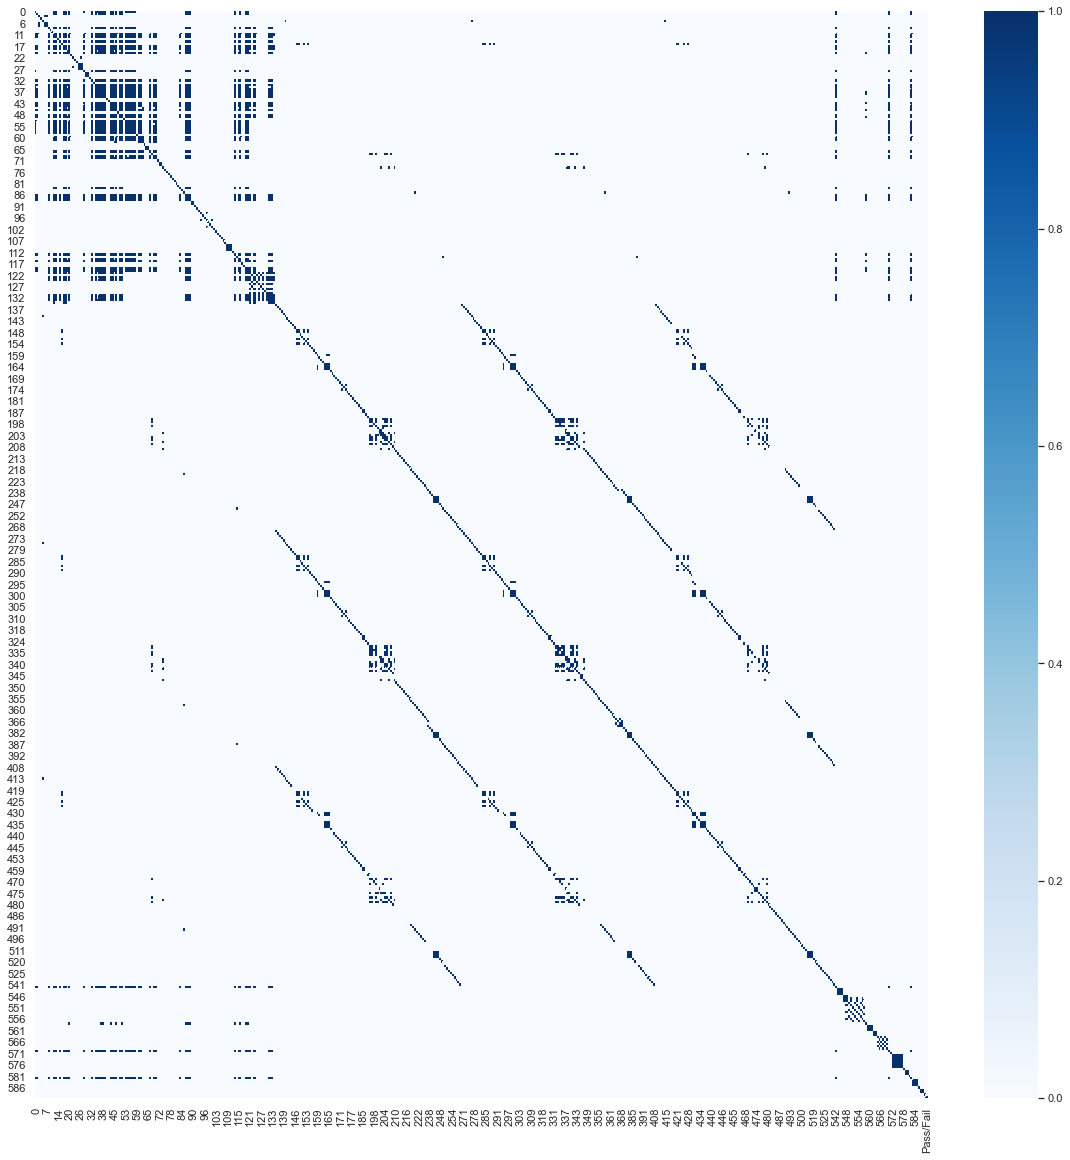

In [22]:
#Since large attributes are present lets look for the correlation between variables, if they are highly correlated we are gonna remove it
plt.figure(figsize=(20,20))
corr = semi.corr()
sns.heatmap(abs(corr>0.75),cmap = "Blues"); #Displaying var that have correlation above 0.75

In [23]:
#Dataset without the target variable
semi_copy = semi.copy()
semi_copy.drop(['Pass/Fail'],axis = 1,inplace=True)


In [24]:
#Now lets create a correlation matrix and find variables/features that have correlation of a certain threshold(0.70).
corr_matrix = semi_copy.corr().abs()
top_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))
#Inputing the threshold
coln = semi.shape[1]
corr_drop = [coln for coln in top_corr.columns if any(top_corr[coln] > 0.70)]

#Droping highly correlated features
semi_copy.drop(corr_drop, axis =1,inplace = True)

In [25]:
semi_copy.shape # shape after dropping

(1567, 160)

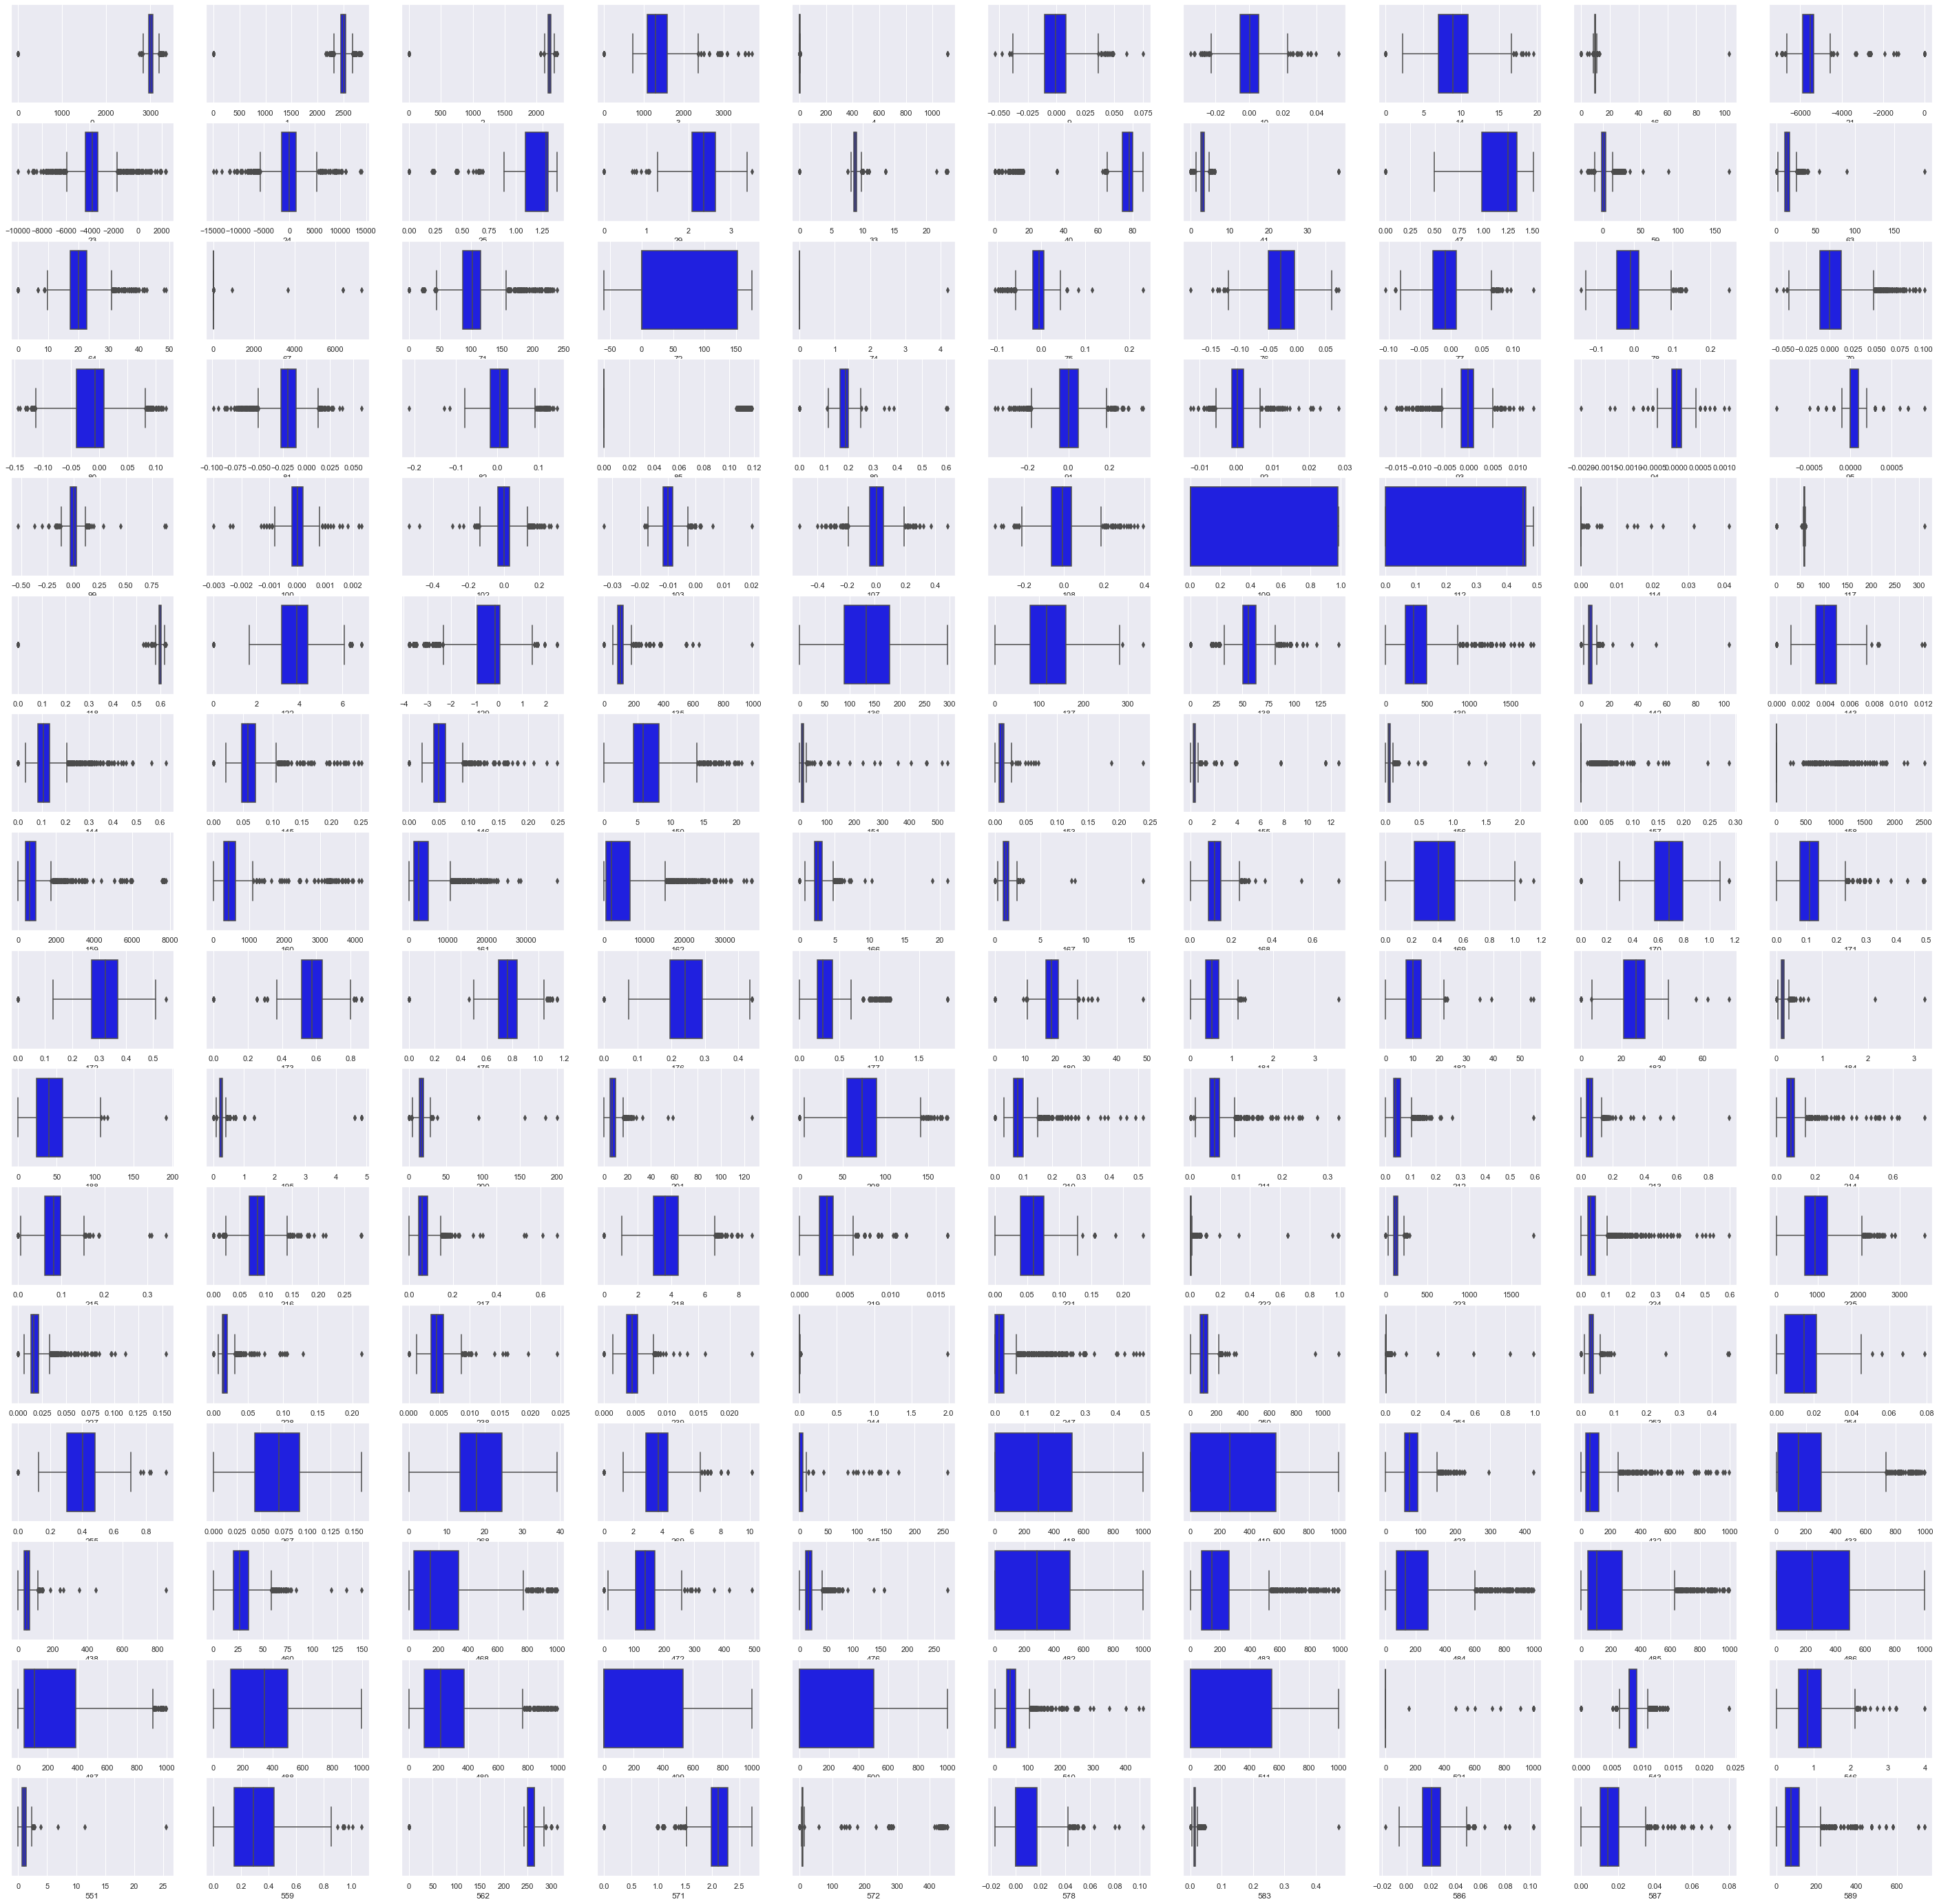

In [26]:
#Now we need to check for outliers
plt.figure(figsize=(50,50))
col =1 
for i in semi_copy:
    plt.subplot(16,10,col)
    sns.boxplot(semi_copy[i],color='blue')
    col +=1

We can observe many outliers, need to impute with median

In [27]:
for i in semi_copy.columns:
    Q1 = semi_copy[i].quantile(0.25)
    Q3 = semi_copy[i].quantile(0.75)
    iqr = Q3 - Q1
    lower = Q1 - 1.5*iqr
    upper = Q3 + 1.5*iqr
    semi_copy.loc[(semi_copy[i] < lower) | (semi_copy[i] > upper), i] = semi_copy[i].median()

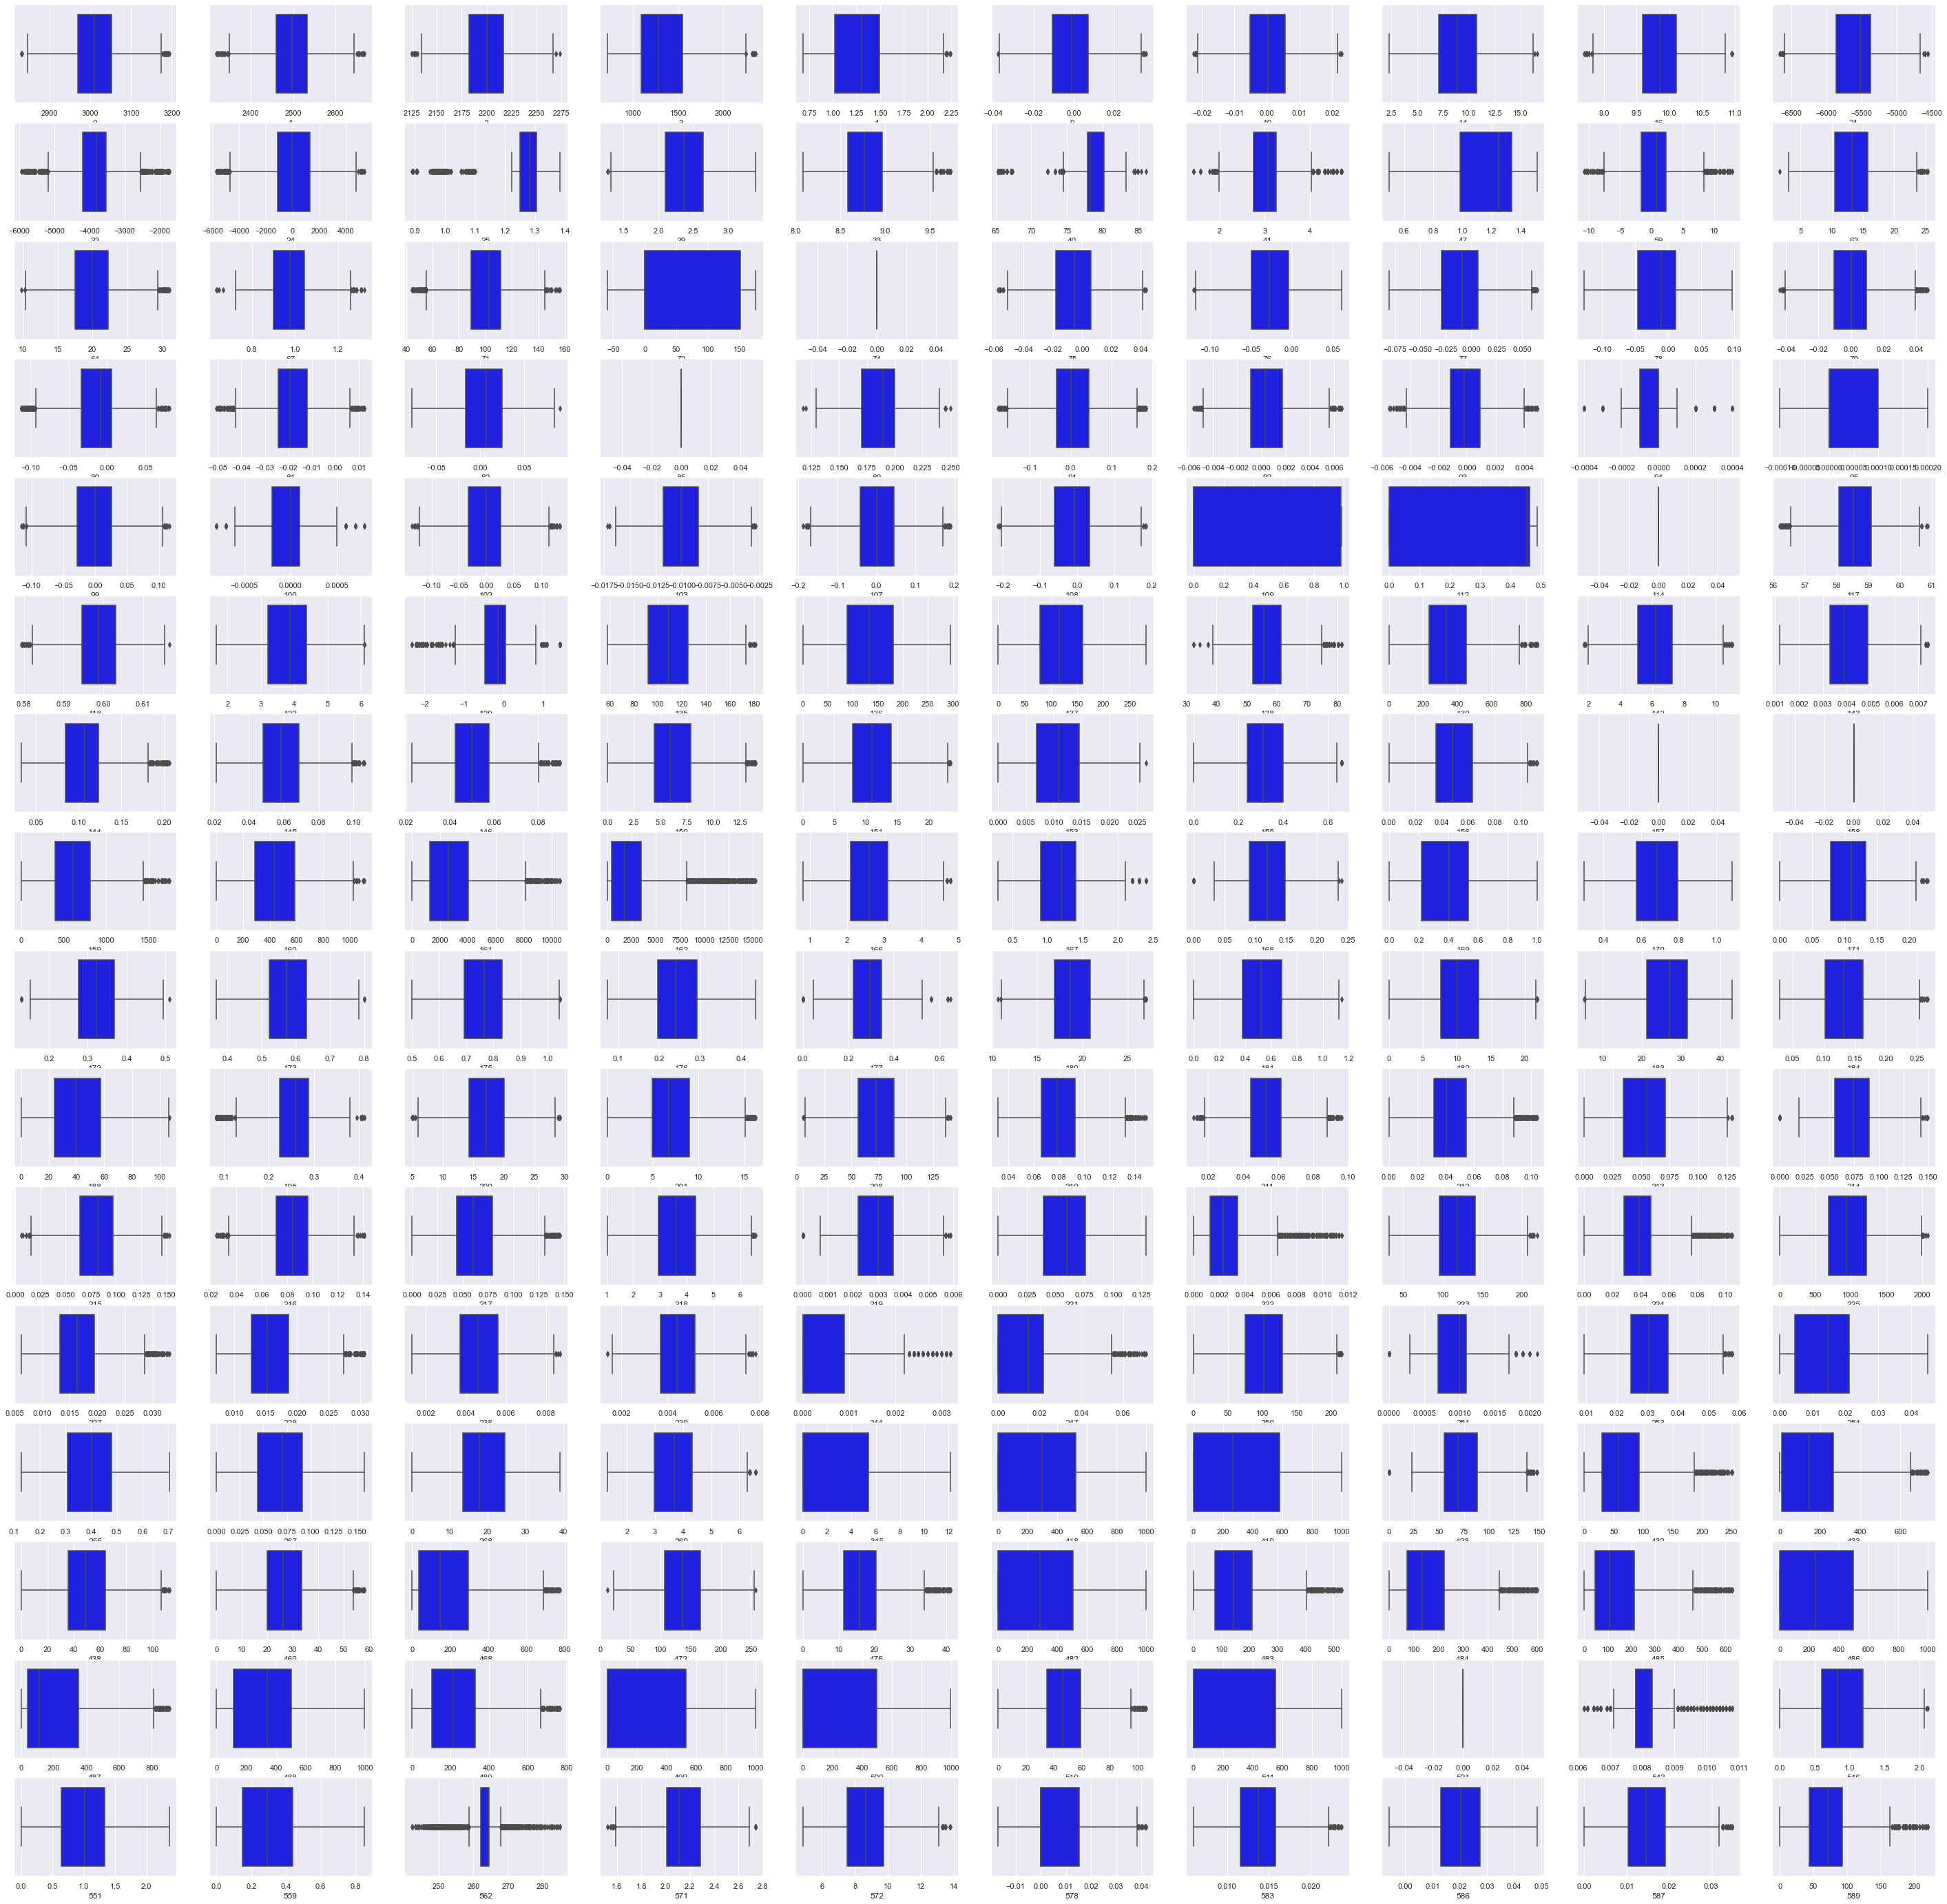

In [28]:
#Now lets look for outliers after imputing
plt.figure(figsize=(50,50))
col =1 
for i in semi_copy:
    plt.subplot(16,10,col)
    sns.boxplot(semi_copy[i],color='blue')
    col +=1

Most outliers are cleared.

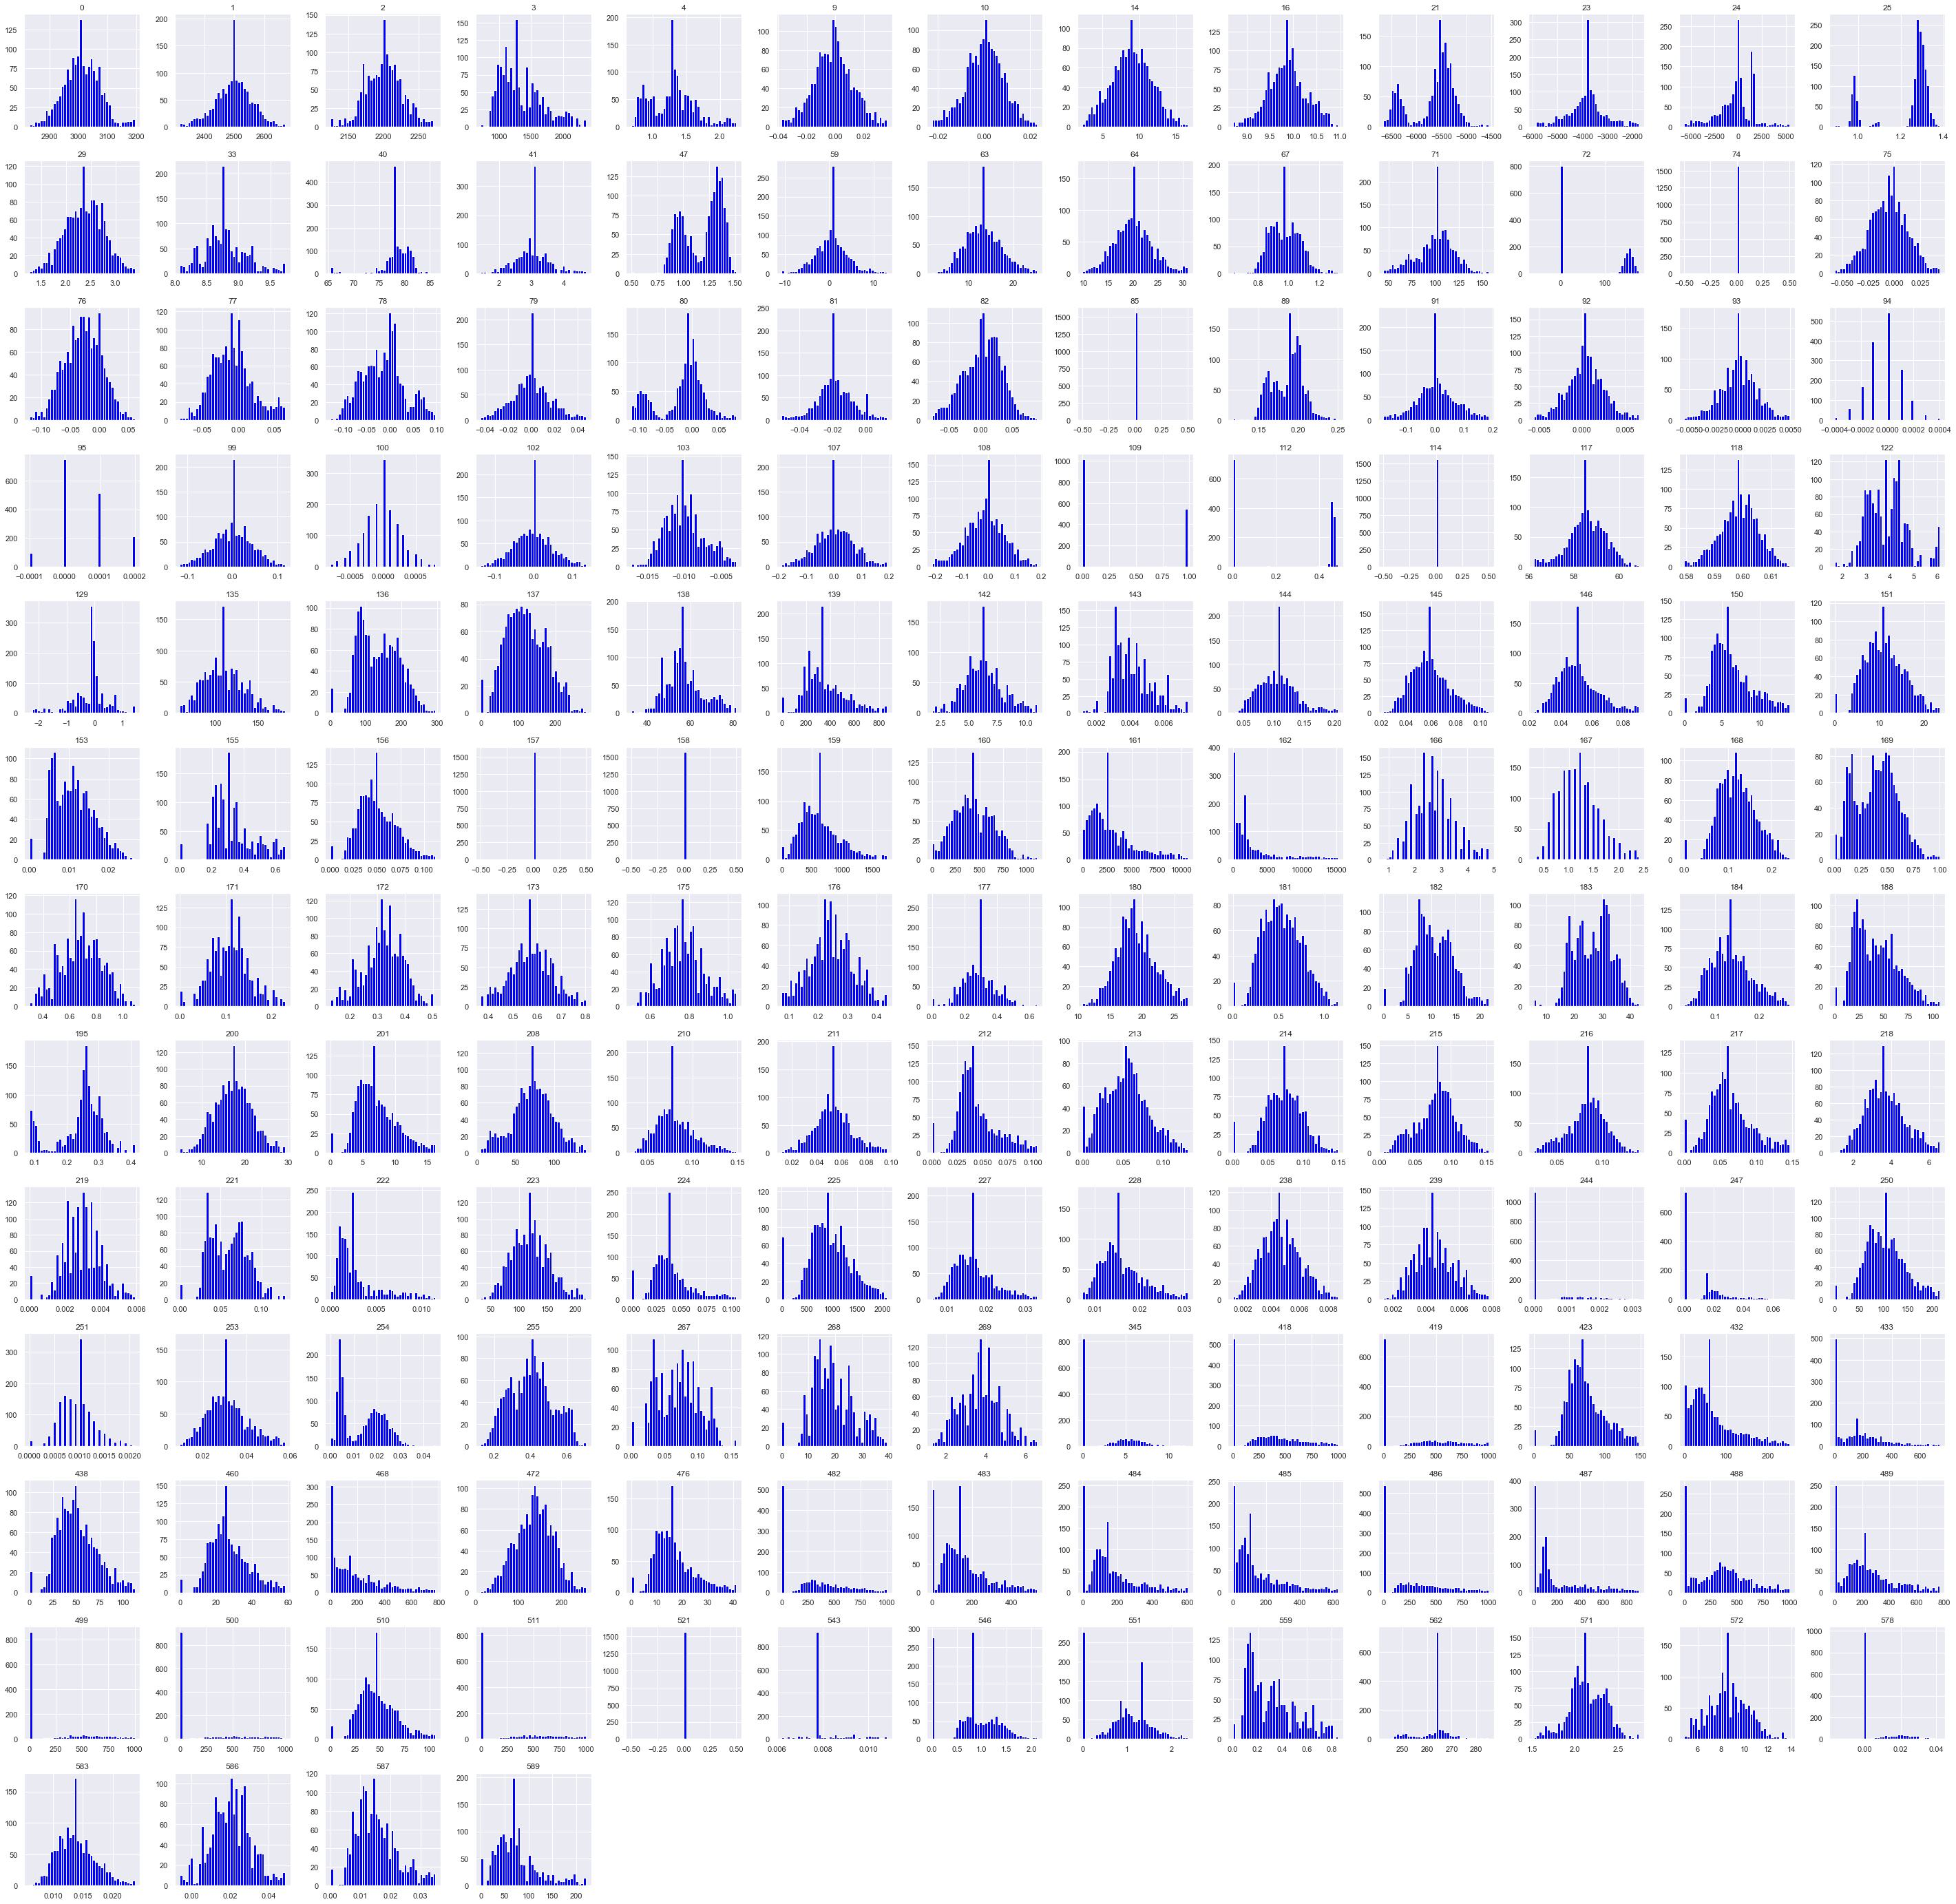

In [29]:
#Now lets plot histogram to check the distribution
semi_copy.hist(bins =40, figsize=(50,50),color = 'blue')
plt.show()

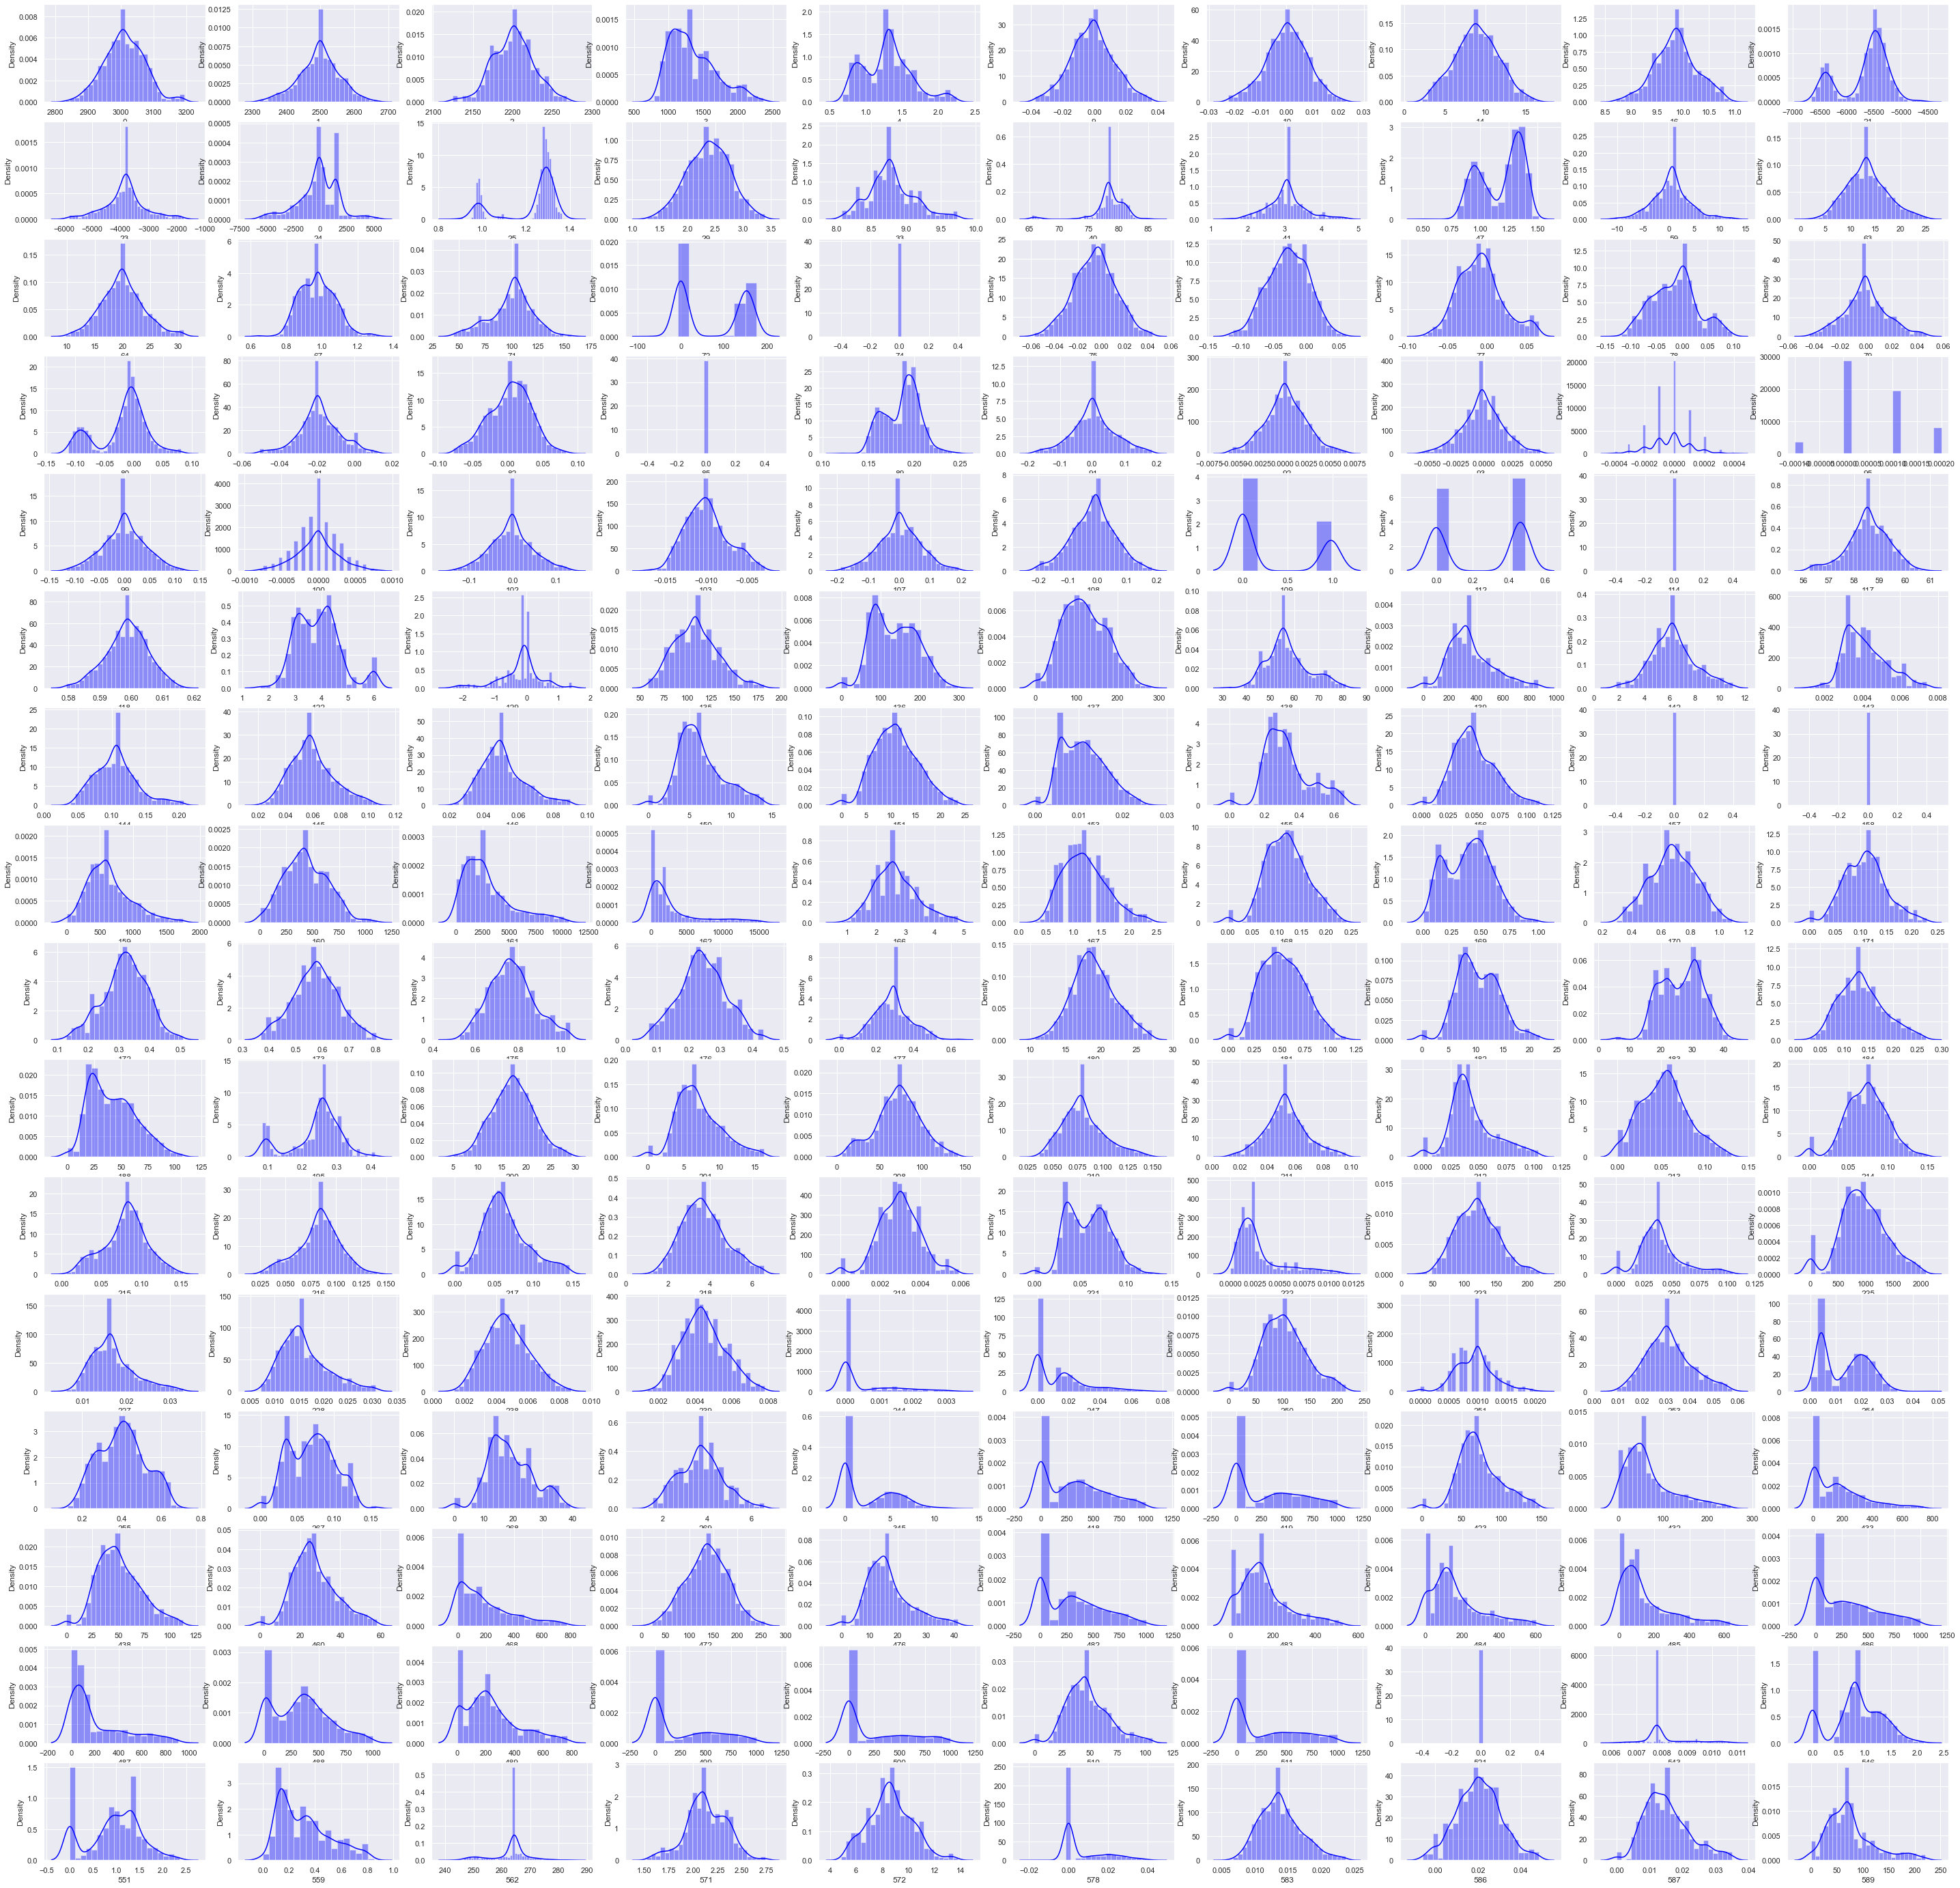

In [30]:
#Lets look for density
plt.figure(figsize=(50,50))
col = 1
for i in semi_copy.columns:
    plt.subplot(16,10,col)
    sns.distplot(semi_copy[i], color = 'blue')
    col += 1

Most variables are normally distributed.

In [31]:
#Lets standardize the values
semi_scaled = semi_copy.apply(zscore)
semi_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,5.225132e-15,1.000319,-2.905188,-0.657617,-0.003238,0.674857,2.962440
1,1567.0,1.560698e-16,1.000319,-2.954991,-0.610001,0.019821,0.620663,2.876713
2,1567.0,-2.582046e-15,1.000319,-2.931404,-0.696232,-0.012425,0.637815,2.835980
3,1567.0,7.950458e-16,1.000319,-1.895313,-0.782626,-0.195701,0.608034,3.015403
4,1567.0,-9.724415e-17,1.000319,-1.855428,-0.834036,0.013707,0.578366,2.857806
9,1567.0,-8.360327e-18,1.000319,-2.651320,-0.669074,0.023429,0.642652,2.749475
10,1567.0,4.432124e-17,1.000319,-2.767427,-0.645650,0.012832,0.671315,2.780897
14,1567.0,3.508990e-16,1.000319,-2.484040,-0.681523,-0.021287,0.684426,2.849496
16,1567.0,2.731785e-15,1.000319,-2.818667,-0.646272,-0.028987,0.600075,2.676429
21,1567.0,-2.202025e-16,1.000319,-2.265674,-0.447203,0.324434,0.663249,2.515233


In [32]:
#Now lets combine the target variable with the rest
y= semi['Pass/Fail']
final_semi = pd.concat([semi_scaled,y],axis = 1)
final_semi.head()

,0,1,2,3,4,9,10,14,16,21,23,24,25,29,33,40,41,47,59,63,64,67,71,72,74,75,76,77,78,79,80,81,82,85,89,91,92,93,94,95,99,100,102,103,107,108,109,112,114,117,118,122,129,135,136,137,138,139,142,143,144,145,146,150,151,153,155,156,157,158,159,160,161,162,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,188,195,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,244,247,250,251,253,254,255,267,268,269,345,418,419,423,432,433,438,460,468,472,476,482,483,484,485,486,487,488,489,499,500,510,511,521,543,546,551,559,562,571,572,578,583,586,587,589,Pass/Fail
0,0.490934,0.079780,0.265574,-1.146378,-0.279325,-2.585367,0.146968,-0.194643,-0.033358,0.199472,-0.415320,-0.724663,0.828936,1.498551,-0.452020,-0.071010,0.064473,0.174965,-0.008587,-0.384659,-0.126597,-0.257579,0.620959,1.223868,NaN,1.440703,0.466082,1.200021,0.373987,-0.929169,0.430356,-1.457245,-0.424635,NaN,1.425068,-0.287268,0.332819,-0.038987,0.951492,1.833560,0.899870,1.154091,0.825899,1.813408,1.479450,1.179707,-0.734321,-1.063090,NaN,1.130070,0.271090,-0.865410,-0.361046,-0.730836,-1.285821,-1.703993,2.020412,0.339298,-0.099566,1.013950,-0.673402,-0.475915,0.786437,-0.388817,1.947092,0.612229,0.893903,1.361092,NaN,NaN,1.209042,1.000158,0.363873,0.704060,-0.091910,-0.007350,0.630403,-0.357826,1.081057,0.833098,1.087187,0.514623,1.985047,-0.598756,-0.894425,1.042905,-0.515655,-0.214883,-0.923414,-0.315658,0.483008,0.358988,0.105115,-0.607892,0.408924,-0.866405,-0.348898,1.578460,1.891540,-0.964625,0.315390,-1.592787,-0.852759,2.161350,-1.115695,1.540077,2.734072,2.450520,0.619212,-0.460065,0.541715,-0.047727,0.457921,0.608302,-0.584902,-0.846983,-0.751646,1.062378,-0.418786,0.412285,-0.277682,-1.223911,2.280619,-1.382806,0.904722,-0.604868,-0.939938,-0.381512,0.411577,1.051521,-0.501913,-0.638549,-1.018528,0.338279,-0.400831,-0.013057,1.751968,1.007322,-1.002839,0.030714,-0.893281,-0.785707,0.899547,-0.802374,-0.739522,2.900228,-0.830695,NaN,-0.377297,1.829338,0.921693,1.656511,0.028909,0.707352,-1.579327,-0.660148,-0.691263,-0.184591,-0.027848,0.145256,0.0
1,-0.348658,0.377744,0.322380,-0.565138,0.765581,-1.793934,-2.206498,1.640728,0.805391,0.440307,-0.223064,-0.585037,0.713074,0.208760,-0.332079,-0.544806,0.064473,-1.730237,0.077163,-0.814314,-0.650244,1.436132,0.656325,1.145008,NaN,-0.461892,-1.413723,-0.212787,0.380773,0.011677,-2.128964,0.667580,-0.171246,NaN,0.548526,0.673893,1.816670,-0.541112,-0.568373,-0.670308,0.019839,2.229702,-0.431937,-0.055696,-0.538759,-0.334208,-0.734321,0.961248,NaN,0.700511,0.896759,-0.865410,-0.361046,-1.027339,1.134042,-0.378404,-1.145320,-0.823963,-0.412046,-0.131587,-1.490859,-1.496998,-0.946471,1.495080,-1.042242,0.693173,0.132338,-0.432456,NaN,NaN,0.815170,-0.276654,0.137815,-0.336454,-1.165712,0.493383,0.275584,0.789811,1.649577,-1.760165,-0.819017,-1.590525,0.814099,0.019916,1.057348,-0.891376,0.611518,1.211984,-0.414842,-0.378481,-0.613289,-1.484555,-1.592401,-0.299193,0.022534,-0.093847,-0.289429,1.554142,-1.391651,0.312975,0.031546,-0.251072,0.736838,-0.782349,1.713103,0.953261,-0.832928,-1.175161,-0.061195,1.044241,-0.052619,0.225146,0.603678,-0.236742,-0.584902,0.869554,0.895956,1.671283,0.401990,-1.069638,-0.699287,-1.223911,2.280619,-1.382806,1.754658,-0.615933,-0.268761,0.192591,0.235972,-0.230439,0.280089,-0.380827,-0.874282,-0.720750,1.948204,-1.096609,-0.761975,2.568977,-0.284312,-0.606848,-0.587029,1.402375,-1.254578,0.398183,-0.739522,-0.070429,-0.069375,NaN,-0.377297,1.263417,0.659834,1.996513,0.211834,-0.335348,-0.489295,1.379189,0.954807,0.248770,-0.649588,-0.615941,0.0
2,-0.364469,0.540301,-0.012425,-0.195701,0.013707,-1.823247,1.390768,1.112889,-0.230297,0.504492,-2.348997,-2.166647,0.604935,0.036702,-0.398475,-0.071010,-2.380031,0.407823,0.949918,-0.847295,-1.044004,-1.268780,0.738107,1.257003,NaN,0.819448,0.630367,1.224995,0.387559,1.869246,0.122575,-2.496858,1.625815,NaN,-0.481796,0.500617,-0.826440,-0.038987,-1.328306,0.581626,0.218556,-0.638594,-0.205318,1.8515

In [33]:
#When scaled some values became NaN, we need to drop those.
final_semi.dropna(axis=1,inplace =True)
final_semi.shape #Shape after dropping null value

(1567, 155)

### 4. Data pre-processing:

In [34]:
#Seperating into target and predictor variable
X = final_semi.drop(['Pass/Fail'],axis=1)
y = final_semi['Pass/Fail']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Pass/Fail, dtype: float64

In [35]:
#Splitting into train and split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=110,stratify=y)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (1096, 154)
shape of X_test:  (471, 154)
shape of y_train:  (1096,)
shape of y_test:  (471,)


### 5. Model training,testing and tuning:

#### No sampling

In [36]:
#Performing different classification algorithms with the normal dataset, we are noting down the accuracies and choosing the best model.
algo = []
algo.append(("LR", LogisticRegression()))
algo.append(("KNN", KNeighborsClassifier()))
algo.append(("GNB", GaussianNB()))
algo.append(("SVM", SVC(kernel='linear')))
algo.append(("DT", DecisionTreeClassifier()))
algo.append(("RF", RandomForestClassifier()))
algo.append(("AB", AdaBoostClassifier()))
algo.append(("GBT", GradientBoostingClassifier()))
algo.append(("XGB", XGBClassifier(verbosity=0)))

#We are testing each model

res = []
mnames = []

for algo, model in algo:
    kfold = StratifiedKFold(n_splits=8, random_state=60,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    res.append(cv_results)
    mnames.append(algo)
    out = '%s: %f%% (%f%%)' % (algo, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 8.337249% (7.311933%)
KNN: 0.000000% (0.000000%)
GNB: 14.288690% (9.517521%)
SVM: 7.064394% (7.259571%)
DT: 5.138889% (7.178016%)
RF: 0.000000% (0.000000%)
AB: 4.545455% (7.872958%)
GBT: 2.272727% (6.013071%)
XGB: 0.000000% (0.000000%)


### Random undersampling

In [37]:
#Implementing random undersampling
usampling = RandomUnderSampler(sampling_strategy = 0.5)
X_under, y_under= usampling.fit_sample(X_train, y_train)


In [38]:
#Lets see the distribution
y_under.value_counts()

0.0    140
1.0     70
Name: Pass/Fail, dtype: int64

In [39]:
#Performing various algorithms on undersampled data
algo = []
algo.append(("LR", LogisticRegression()))
algo.append(("KNN", KNeighborsClassifier()))
algo.append(("GNB", GaussianNB()))
algo.append(("SVM", SVC(kernel='linear')))
algo.append(("DT", DecisionTreeClassifier()))
algo.append(("RF", RandomForestClassifier()))
algo.append(("AB", AdaBoostClassifier()))
algo.append(("GBT", GradientBoostingClassifier()))
algo.append(("XGB", XGBClassifier(verbosity=0)))

#We are testing each model

res = []
mnames = []

for algo, model in algo:
    kfold = StratifiedKFold(n_splits=8, random_state=60,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    res.append(cv_results)
    mnames.append(algo)
    out = '%s: %f%% (%f%%)' % (algo, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 45.128990% (14.874792%)
KNN: 22.178238% (11.906755%)
GNB: 41.542500% (11.734440%)
SVM: 43.834003% (9.395026%)
DT: 40.638619% (13.078191%)
RF: 9.318182% (13.030083%)
AB: 44.821429% (10.379829%)
GBT: 28.883266% (16.733390%)
XGB: 31.895604% (16.760601%)


### SMOTE

In [40]:
#Lets perform SMOTE
smt = SMOTE(sampling_strategy=0.5)
X_Smote, y_Smote = smt.fit_sample(X_train, y_train)

In [41]:
#Lets see the distribution for smote
y_Smote.value_counts()

0.0    1026
1.0     513
Name: Pass/Fail, dtype: int64

In [42]:
#Performing various algorithms on SMOTE data
algo = []
algo.append(("LR", LogisticRegression()))
algo.append(("KNN", KNeighborsClassifier()))
algo.append(("GNB", GaussianNB()))
algo.append(("SVM", SVC(kernel='linear')))
algo.append(("DT", DecisionTreeClassifier()))
algo.append(("RF", RandomForestClassifier()))
algo.append(("AB", AdaBoostClassifier()))
algo.append(("GBT", GradientBoostingClassifier()))
algo.append(("XGB", XGBClassifier(verbosity=0)))

#We are testing each model

res = []
mnames = []

for algo, model in algo:
    kfold = StratifiedKFold(n_splits=8, random_state=60,shuffle=True)
    cv_results = cross_val_score(model, X_Smote, y_Smote, cv=kfold, scoring='f1')
    res.append(cv_results)
    mnames.append(algo)
    out = '%s: %f%% (%f%%)' % (algo, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 75.382571% (2.756396%)
KNN: 53.109624% (0.461176%)
GNB: 80.023433% (4.262682%)
SVM: 78.052319% (2.999494%)
DT: 78.109321% (3.084049%)
RF: 96.863885% (1.511696%)
AB: 87.635370% (2.857103%)
GBT: 94.376702% (2.297988%)
XGB: 96.602193% (1.286799%)


### Random Oversampling

In [43]:
#Implementing Oversampling
osampling  = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= osampling.fit_sample(X_train, y_train)

In [44]:
#Lets see the distribution for random oversampling
y_over.value_counts()

0.0    1026
1.0     513
Name: Pass/Fail, dtype: int64

In [45]:
#Performing various algorithms on random oversampled data
algo = []
algo.append(("LR", LogisticRegression()))
algo.append(("KNN", KNeighborsClassifier()))
algo.append(("GNB", GaussianNB()))
algo.append(("SVM", SVC(kernel='linear')))
algo.append(("DT", DecisionTreeClassifier()))
algo.append(("RF", RandomForestClassifier()))
algo.append(("AB", AdaBoostClassifier()))
algo.append(("GBT", GradientBoostingClassifier()))
algo.append(("XGB", XGBClassifier(verbosity=0)))

#We are testing each model

res = []
mnames = []

for algo, model in algo:
    kfold = StratifiedKFold(n_splits=8, random_state=60,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    res.append(cv_results)
    mnames.append(algo)
    out = '%s: %f%% (%f%%)' % (algo, cv_results.mean()*100, cv_results.std()*100)
    print(out)

LR: 75.938954% (3.430251%)
KNN: 83.707571% (1.845371%)
GNB: 58.169425% (5.308047%)
SVM: 80.426841% (4.252245%)
DT: 91.713759% (1.600919%)
RF: 100.000000% (0.000000%)
AB: 88.426121% (2.674109%)
GBT: 99.613894% (0.544988%)
XGB: 99.904580% (0.252457%)


### Gaussian Naive Bayes on Normal Dataset

In [46]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [47]:
gaus_score = nb.score(X_train, y_train)
y_predictnb= nb.predict(X_test)
modelnb_score = accuracy_score(y_test, y_predictnb)
print('Accuracy Score of Training Data: ', gaus_score)
print('Accuracy Score of Test Data:', modelnb_score)

Accuracy Score of Training Data:  0.8357664233576643
Accuracy Score of Test Data: 0.8174097664543525


In [48]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictnb, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.11      0.27      0.16        30
           0       0.94      0.85      0.90       441

    accuracy                           0.82       471
   macro avg       0.53      0.56      0.53       471
weighted avg       0.89      0.82      0.85       471



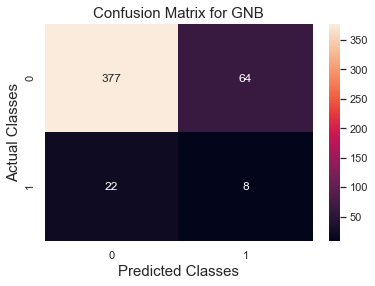

In [49]:
#confusion matrix
cm= confusion_matrix(y_test, y_predictnb)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted Classes', fontsize = 15)
plt.ylabel('Actual Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);

### Gaussian Naive Bayes on Under sampled Data

In [50]:
nbu = GaussianNB()
nbu.fit(X_under, y_under)

GaussianNB()

In [51]:
modelnbu_score_train = nbu.score(X_under,y_under)
y_predictnbu= nbu.predict(X_test)
modelnbu_score_test = accuracy_score(y_test, y_predictnbu)
print('Accuracy Score of Training Data: ', modelnbu_score_train)
print('Accuracy Score of Test Data:', modelnbu_score_test)


Accuracy Score of Training Data:  0.8047619047619048
Accuracy Score of Test Data: 0.6836518046709129


In [52]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictnbu, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.08      0.40      0.14        30
           0       0.95      0.70      0.81       441

    accuracy                           0.68       471
   macro avg       0.51      0.55      0.47       471
weighted avg       0.89      0.68      0.76       471



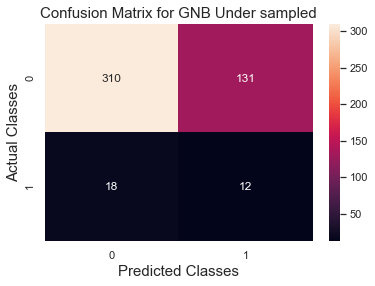

In [53]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictnbu)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);

### 6. Conclusion and improvisation:

 Gaussian Naive bayes gives a better performance. Dataset could have been more clear.